In [1]:
%matplotlib notebook

# Standard library imports
import logging

# Third party imports
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp 
from numpy.linalg import multi_dot, norm
from toolz import concat, first
import matplotlib.pyplot as plt
from matplotlib import animation
#from toolz import concat

# Local application imports
#from myorbit.graphics_util import OrbitsPlot, calc_interval
#import myorbit.data_catalog as dc
#from myorbit.scripts import calc_orbits_heliocentric_data, change_reference_frame
#from myorbit.ephemeris_input import EphemrisInput

%load_ext autoreload
%autoreload 2


Bad key "text.kerning_factor" on line 4 in
/home/anybody/apps/anaconda3/envs/py37astro/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Initial value problem
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [3]:
class OrbitPlotter2D:
    def __init__(self, orbs_data, x_axlimits, y_axlimits, t_refs) :
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, aspect='equal', autoscale_on=False)        
        self.orbs = orbs_data        
        self.n_trajectories = len(self.orbs)
        self.t_refs = t_refs
        
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        #ax.axis('off')
        
        # prepare the axes limits
        self.ax.set_xlim(x_axlimits)
        self.ax.set_ylim(y_axlimits)
        
        self.ax.set_xlabel("X")
        self.ax.set_ylabel("Y")        
        
        n_trajectories = len(self.orbs)

        # choose a different color for each trajectory
        colors = plt.cm.jet(np.linspace(0, 1, n_trajectories))

        # lines and points initializaiton
                
        lines = []
        pts = []
        for i, (name, mtx) in enumerate(orbs.items()):
            lines.append(self.ax.plot([], [], '--', c=colors[i], label=name,lw=.7))
            pts.append(self.ax.plot([], [], 'o', c=colors[i]))
        self.lines = list(concat(lines))
        self.pts = list(concat(pts))

        # set the legend, title and animation encoding type
        self.ax.legend(loc='upper right', prop={'size': 9})

        axtext = self.fig.add_axes([0.0,0.95,0.1,0.05])
        # turn the axis labels/spines/ticks off
        axtext.axis("off")

        self.time_obj = axtext.text(0.5,0.5, sol.t[0], ha="left", va="top")        

    # initialization function: plot the background of each frame
    def init(self):
        for line, pt in zip(lines, pts):
            line.set_data([], [])
            pt.set_data([], [])
        return lines + pts

    def animate(self, i):
        for line, pt, mtx in zip(self.lines, self.pts, self.orbs.values()):
            xs = mtx[0:i,0]        
            ys = mtx[0:i,1]
            line.set_data(xs, ys)
            x = xs[-1:]
            y = ys[-1:]
            pt.set_data(x, y)
            self.time_obj.set_text(self.t_refs[i])
        #ax.view_init(30, 0.3 * i)
        return lines + pts       
    
    def start(self,interval=1000, blit=False, repeat=False):
        self.anim = animation.FuncAnimation(self.fig, self.animate, frames=len(self.t_refs), interval=interval, blit=blit, repeat=repeat)

In [8]:
class OrbitPlotter3D:
    #t_refs= sol.t[i]

    def __init__(self, orbs_data, x_axlimits, y_axlimits, t_refs) :
        self.fig = plt.figure()
        self.ax = self.fig.add_axes([0, 0, 1, 1], projection='3d')
        self.orbs = orbs_data        
        self.n_trajectories = len(self.orbs)
        self.t_refs = t_refs
        
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_zlabel('z')
        #ax.axis('off')
        
        # prepare the axes limits
        self.ax.set_xlim(x_axlimits)
        self.ax.set_ylim(y_axlimits)
        self.ax.set_zlim(y_axlimits)
        
        self.ax.set_xlabel("X")
        self.ax.set_ylabel("Y")        
        
        n_trajectories = len(self.orbs)

        # choose a different color for each trajectory
        colors = plt.cm.jet(np.linspace(0, 1, n_trajectories))

        # lines and points initializaiton
                
        lines = []
        pts = []
        for i, (name, mtx) in enumerate(orbs.items()):
            lines.append(self.ax.plot([], [], '--', c=colors[i], label=name,lw=.7))
            pts.append(self.ax.plot([], [], 'o', c=colors[i]))
        self.lines = list(concat(lines))
        self.pts = list(concat(pts))

        # set the legend, title and animation encoding type
        self.ax.legend(loc='upper right', prop={'size': 9})

        axtext = self.fig.add_axes([0.0,0.95,0.1,0.05])
        # turn the axis labels/spines/ticks off
        axtext.axis("off")

        self.time_obj = axtext.text(0.5,0.5, sol.t[0], ha="left", va="top")        

    # initialization function: plot the background of each frame
    def init(self):        
        for line, pt in zip(self.lines, self.pts):
            line.set_data([], [])
            line.set_3d_properties([])
            pt.set_data([], [])
            pt.set_3d_properties([])
        return self.lines + self.pts    
    

    def animate(self, i):
        for line, pt, mtx in zip(self.lines, self.pts, self.orbs.values()):
                    xs = mtx[0:i,0]        
                    ys = mtx[0:i,1]
                    zs = mtx[0:i,2]
                    line.set_data(xs, ys)
                    line.set_3d_properties(zs)
                    x = xs[-1:]
                    y = ys[-1:]
                    z = zs[-1:]        
                    pt.set_data(x, y)
                    pt.set_3d_properties(z)    
        return lines + pts
    
    def start(self,interval=1000, blit=False, repeat=False):
        self.anim = animation.FuncAnimation(self.fig, self.animate, frames=len(self.t_refs), interval=interval, blit=blit, repeat=repeat)

In [4]:
# Two bodys 
G = 6.6742e-20 # Km^3/Kg*s^2
m1 = m2 = 1e26
# Initial position and velocity vectors of m1
r0_xyz_m1 = np.array([0,0,0])
v0_xyz_m1 = np.array([10,20,30])
# Initial position and velocity vectors of m2
r0_xyz_m2 = np.array([3000,0,0])
v0_xyz_m2 = np.array([0,40,0])
Y0 = np.concatenate((r0_xyz_m1, r0_xyz_m2, v0_xyz_m1, v0_xyz_m2))
t0 = 0
tf = 480

def my_dfdt(t, Y, G, m1, m2):     
    """ Y is the state vector
    my_dfdt is the time derivative of the state vector (r_xyz,v_xyz) which can be expressed as a function of the
    the state vector and the time since the aceleration can be expressed as function of the r(t), i.e.,
    as function of the state vector.
    
    Parameters
    ----------
    t : [type]
        [description]
    Y : [type]
        [description]
    G : [type]
        [description]
    m1 : [type]
        [description]
    m2 : [type]
        [description]

    Returns
    -------
    [type]
        [description]    
    """
    r1_xyz = Y[0:3]
    r2_xyz = Y[3:6]
    v1_xyz = Y[6:9]
    v2_xyz = Y[9:12]
    r_3  = np.linalg.norm(r2_xyz-r1_xyz)**3
    acc1_xyz = G*m2*(r2_xyz - r1_xyz)/r_3
    acc2_xyz = G*m1*(r1_xyz - r2_xyz)/r_3
    return np.concatenate((v1_xyz, v2_xyz, acc1_xyz, acc2_xyz))

sol = solve_ivp(my_dfdt, (t0, tf), Y0, args=(G,m1,m2), t_eval=list(range(0,480,4)), rtol = 1e-5)  
print (sol.y.shape)

(12, 120)


<IPython.core.display.Javascript object>


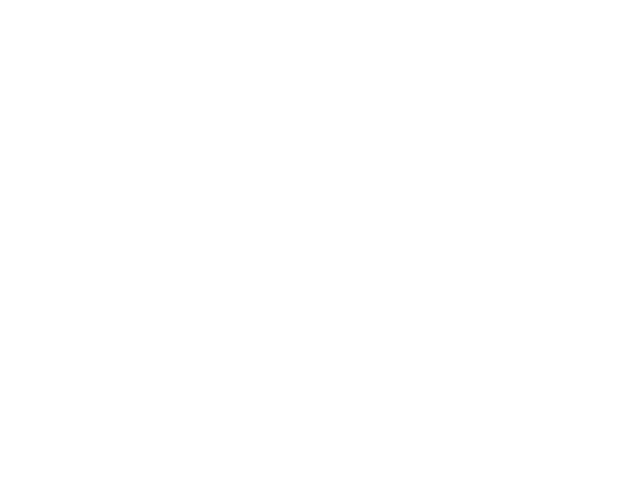

ValueError: Unknown projection '3d'

In [9]:
# Two equivalent bodys w.r.t an inertial frame of reference
orbs={}
orbs['m1'] = sol.y[0:3,:].T
orbs['m2'] = sol.y[3:6,:].T
orbs['G'] =  (m1*orbs['m1']+m2*orbs['m2'])/(m1+m2)

x_limits = (-10000,10000)
y_limits = (-10000,10000)
plotter = OrbitPlotter3D(orbs, x_limits, y_limits, sol.t)
plotter.start(interval=250)
plt.show()

<IPython.core.display.Javascript object>


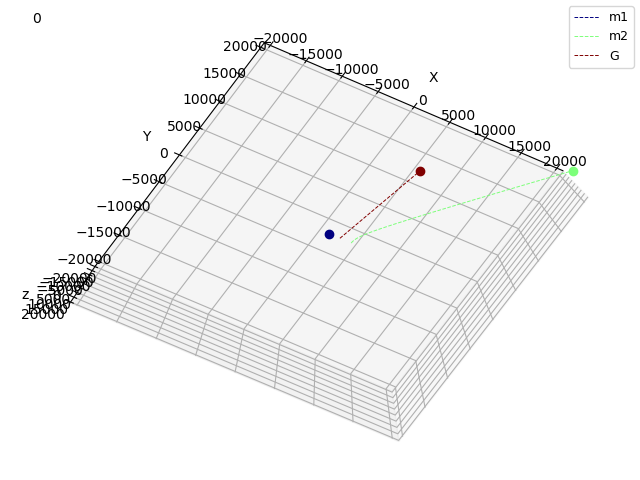

In [169]:
# Two equivalent bodys w.r.t m1
orbs={}
orbs['m1'] = sol.y[0:3,:].T
orbs['m2'] = sol.y[3:6,:].T
orbs['G'] =  (m1*orbs['m1']+m2*orbs['m2'])/(m1+m2)

# With respect m1
orbs['m1'] =  orbs['m1']  - orbs['m1']
orbs['m2'] =  orbs['m2']  - orbs['m1'] 
orbs['G']  =  orbs['G']  - orbs['m1']


x_limits = (-20000,20000)
y_limits = (-20000,20000)
plotter = OrbitPlotter3D(orbs, x_limits, y_limits, sol.t)
plotter.start(interval=250)
plt.show()

<IPython.core.display.Javascript object>


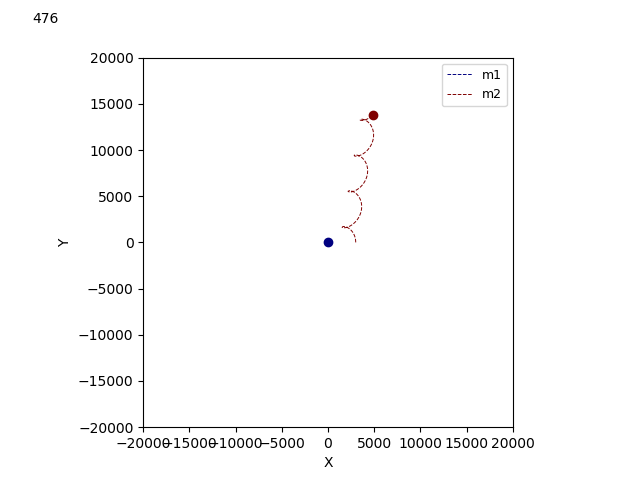

In [126]:
# Two equivalent bodys w.r.t one of them
orbs={}
orbs['m1'] = sol.y[0:2,:].T
orbs['m2'] = sol.y[3:5,:].T

# With respect m1
orbs['m1'] =  orbs['m1']  - orbs['m1']
orbs['m2'] =  orbs['m2']  - orbs['m1'] 

x_limits = (-20000,20000)
y_limits = (-20000,20000)
plotter = OrbitPlotter(orbs, x_limits, y_limits, sol.t)
plotter.start(interval=250)
plt.show()

In [164]:
# Two bodys, m1 is very big and m2 is small with relative acceleration
G = 6.6742e-20 # Km^3/Kg*s^2
m1 = 5.974e24
R =  6378
m2 = 1000
r0_xyz= np.array([8000,0,6000])
v0_xyz = np.array([0, 7, 0])
t0 = 0 
tf = 5*3600
Y0 = np.concatenate((r0_xyz, v0_xyz))

def my_dfdt(t, Y, G, m1, m2):        
    x = Y[0:3]
    v = Y[3:6]
    r_3  = np.linalg.norm(x)**3
    mu = G*(m1+m2)
    acc = -mu/r_3*x    
    return np.concatenate((v, acc))

sol = solve_ivp(my_dfdt, (t0, tf), Y0, args=(G,m1,m2), t_eval=list(range(t0,tf,100)), rtol = 1e-10)  
print (sol.y.shape)

(6, 180)


<IPython.core.display.Javascript object>


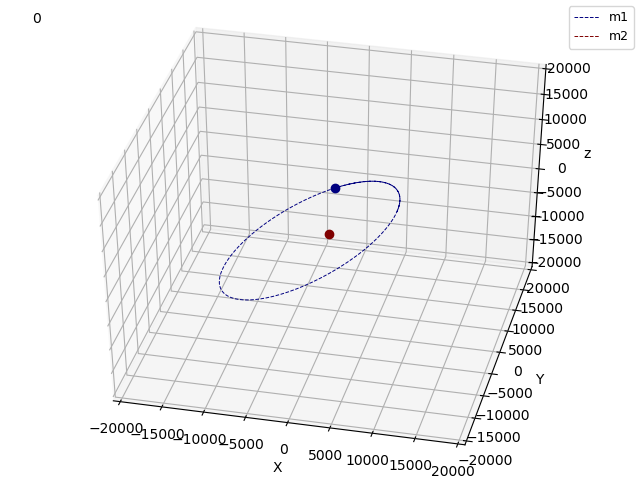

In [165]:
orbs={}
orbs['m1'] = sol.y[0:3,:].T
orbs['m2'] = orbs['m1'] - orbs['m1']
x_limits = (-20000,20000)
y_limits = (-20000,20000)
plotter = OrbitPlotter3D(orbs, x_limits, y_limits, sol.t)
plotter.start(interval=250)
plt.show()

In [156]:
# Three equivalent bodys
G = 6.6742e-20 # Km^3/Kg*s^2
m1 = m2 = m3 = 1e29
x1 = np.array([0,0])
x2 = np.array([300000,0])
x3 = 2*x2

v1 = np.array([0,0])
v2 = np.array([250,250])
v3 = np.array([0,0])

t0 = 0 
tf = 67000
Y0 = np.concatenate((x1, x2, x3, v1, v2, v3))


def my_dfdt(t, Y, G, m1, m2, m3):
    x1 = Y[0:2]
    x2 = Y[2:4]
    x3 = Y[4:6]
    
    v1 = Y[6:8]
    v2 = Y[8:10]
    v3 = Y[10:12]
    
    r12__3 = np.linalg.norm(x1-x2)**3
    r23__3 = np.linalg.norm(x2-x3)**3
    r13__3 = np.linalg.norm(x1-x3)**3
    
    a1 = G*((m2*(x2-x1)/r12__3) + (m3*(x3-x1)/r13__3))
    a2 = G*((m1*(x1-x2)/r12__3) + (m3*(x3-x2)/r23__3))
    a3 = G*((m1*(x1-x3)/r13__3) + (m2*(x2-x3)/r23__3))
    
    return np.concatenate((v1,v2,v3,a1,a2,a3))
    
sol = solve_ivp(my_dfdt, (t0, tf), Y0, args=(G,m1,m2,m3), t_eval=list(range(t0,tf,1000)), rtol = 1e-10)  
    

<IPython.core.display.Javascript object>


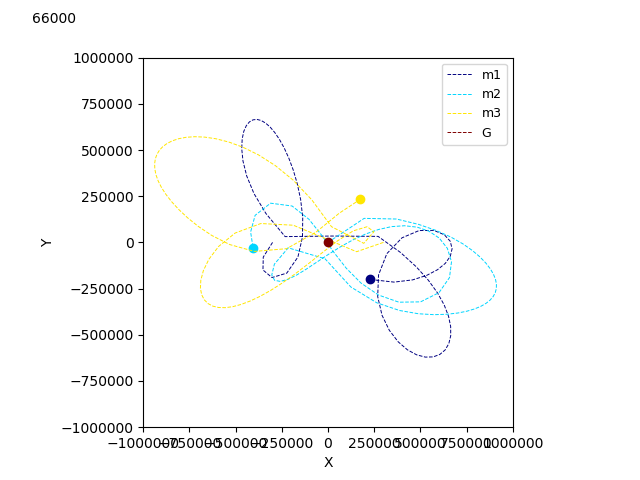

In [157]:
# Here the r's and v's have only 2 dimensions
# Three bodys w.r.t the mass centre
orbs={}
orbs['m1'] = sol.y[:2,:].T
orbs['m2'] = sol.y[2:4,:].T
orbs['m3'] = sol.y[4:6,:].T
orbs['G'] =  (m1*orbs['m1']+m2*orbs['m2']+m3*orbs['m3'])/(m1+m2+m3)

# With respect G
orbs['m1'] =  orbs['m1']  - orbs['G']
orbs['m2'] =  orbs['m2']  - orbs['G'] 
orbs['m3'] =  orbs['m3']  - orbs['G'] 
orbs['G']  =  orbs['G']  - orbs['G']

x_limits = (-1000000,1000000)
y_limits = (-1000000,1000000)
plotter = OrbitPlotter(orbs, x_limits, y_limits, sol.t)
plotter.start(interval=250)
plt.show()

<IPython.core.display.Javascript object>


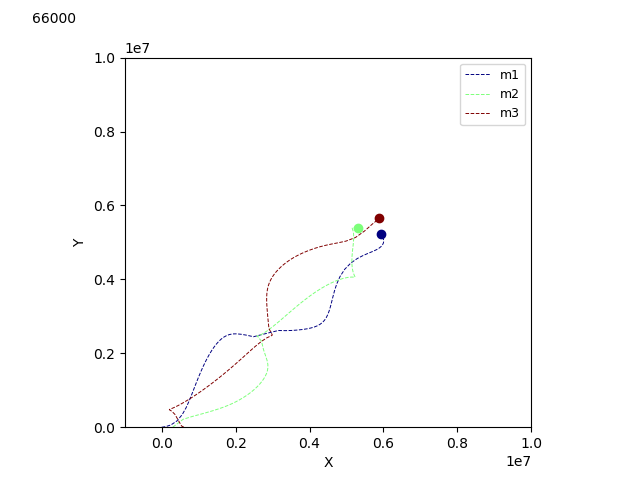

In [162]:
# Here the r's and v's have only 2 dimensions
# Three bodys w.r.t an inertial frame of reference
orbs={}
orbs['m1'] = sol.y[:2,:].T
orbs['m2'] = sol.y[2:4,:].T
orbs['m3'] = sol.y[4:6,:].T

x_limits = (-1000000,10000000)
y_limits = (0,10000000)
plotter = OrbitPlotter(orbs, x_limits, y_limits, sol.t)
plotter.start(interval=250)
plt.show()